In [27]:
from skimage.segmentation import find_boundaries
from dataset_generator import DatasetGenerator
import numpy as np
from image_utils import standardize
import matplotlib.pyplot as plt
from scipy.ndimage.morphology import distance_transform_bf
import torch

In [28]:
PATH_VALIDATION='../DATA_GHANA/DATASET/120_x_120_8_bands/TEST/'
validation_size=20

val_generator = DatasetGenerator.from_root_folder(PATH_VALIDATION, batch_size=validation_size)
val_generator=val_generator.shuffled()
val_generator=val_generator.__iter__()
X_val,Y_val=val_generator.__next__()
X_val=standardize(X_val)

image 0


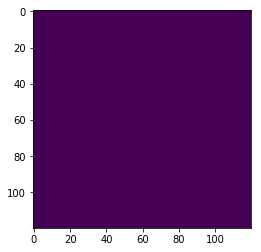

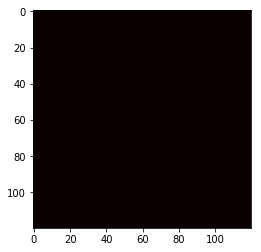

image 1


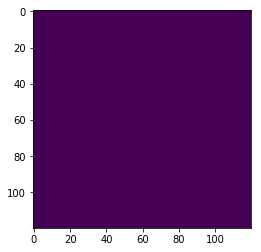

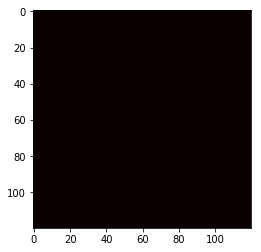

image 2


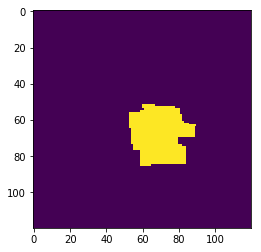

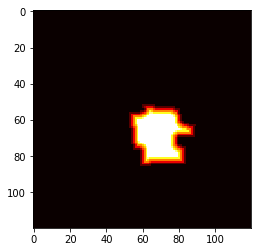

image 3


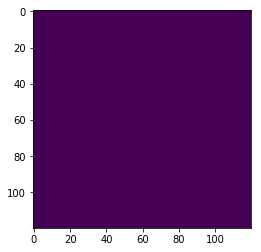

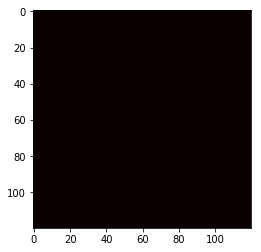

image 4


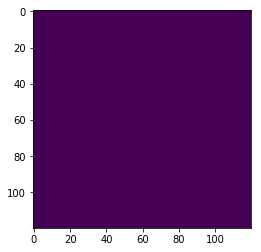

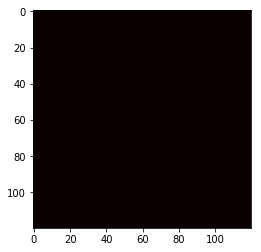

image 5


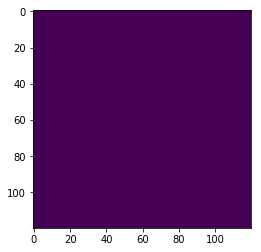

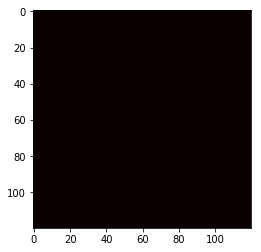

image 6


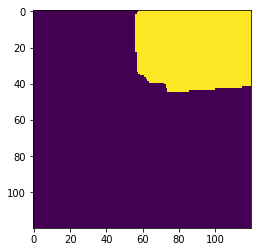

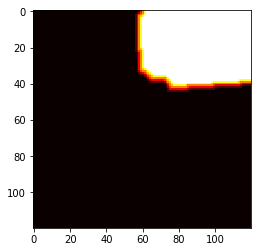

image 7


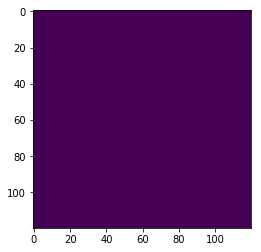

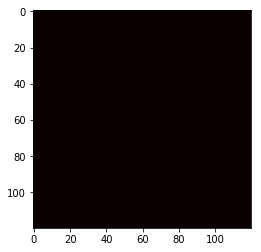

image 8


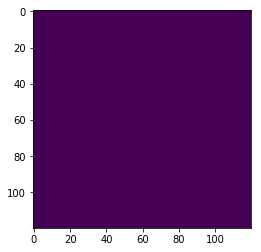

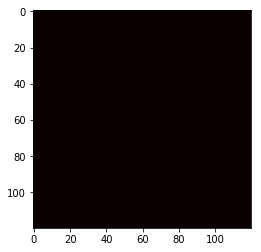

image 9


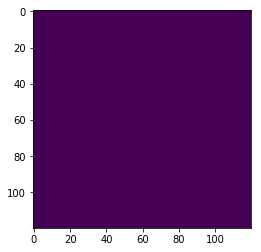

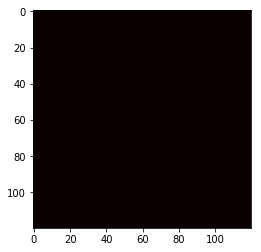

image 10


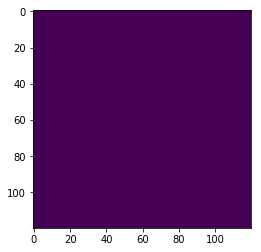

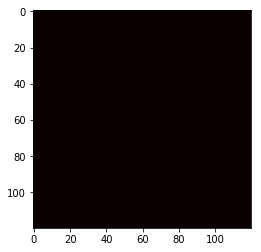

image 11


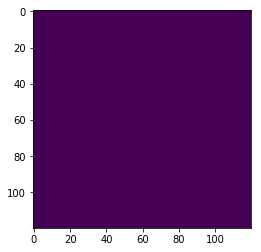

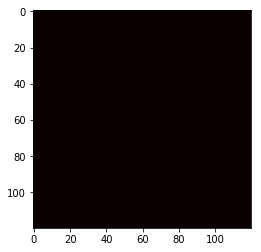

image 12


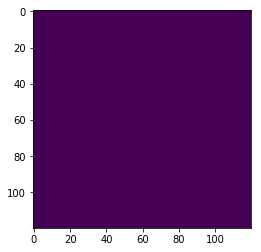

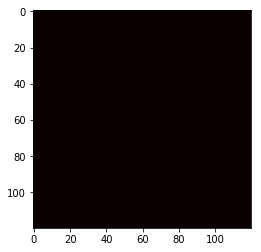

image 13


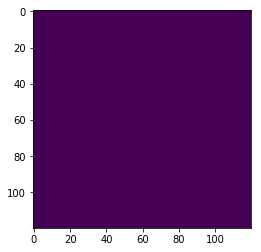

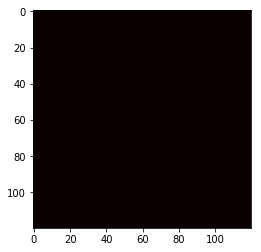

image 14


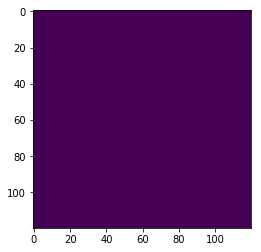

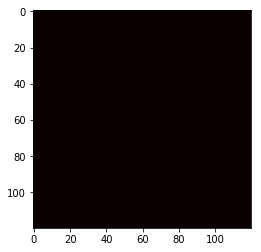

image 15


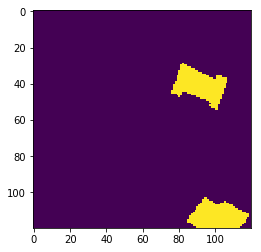

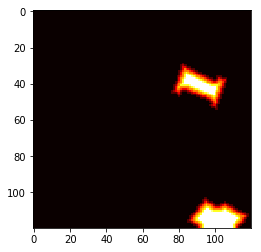

image 16


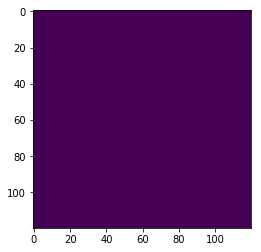

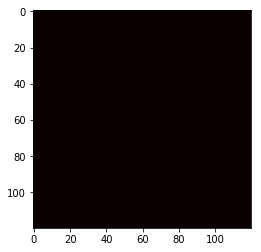

image 17


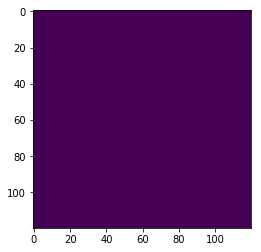

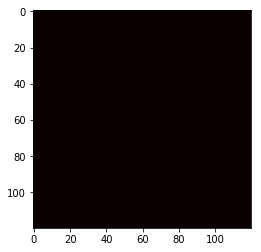

image 18


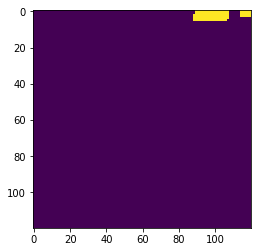

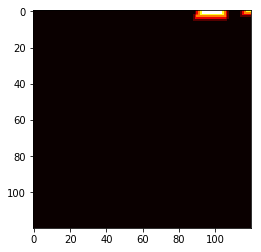

image 19


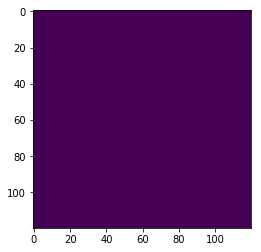

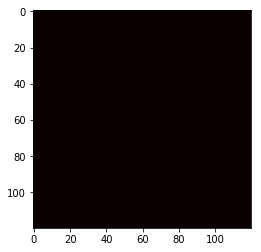

In [29]:
K=10

# with tf.Session() as sess:
for i in range(validation_size): 
    print('image %d'%i)
    plt.imshow(Y_val[i,:,:,0])
    plt.show()
    distance=distance_transform_bf(Y_val[i,:,:,0],sampling=4)
    test=np.minimum(distance,20*(distance>0))*9/20
    inp=torch.LongTensor(test)
    inp_ = torch.unsqueeze(inp, len(test.shape))
    one_hot = torch.FloatTensor(test.shape[0], test.shape[1], K).zero_()
    one_hot.scatter_(len(test.shape), inp_, 1)
    

#         test=tf.one_hot(test,K).eval()
    plt.imshow(np.argmax(one_hot,axis=2),cmap="hot")
    plt.show()